<a href="https://colab.research.google.com/github/Rajeshpatra12/Agile_Workshop/blob/main/Handwritten%20character.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rajesh Patra

# MNIST Handwritten Character Recognition

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


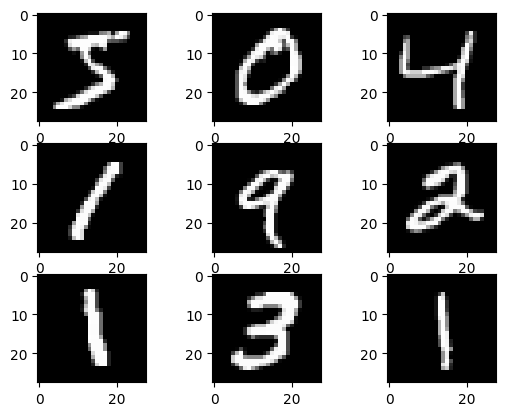

In [1]:
#example of loading mnist dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
#load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
#summarize dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
#plot first few images
for i in range(9):
    #define subplot
    plt.subplot(330 + 1 + i)
    #plot raw pixel data
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
#show the figure
plt.show()

In [2]:
pip install h5py

# Load Dataset

In [3]:
pip install tensorflow

In [4]:
pip install keras

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


> 97.66


> 97.93


> 97.60


> 97.92


> 98.04


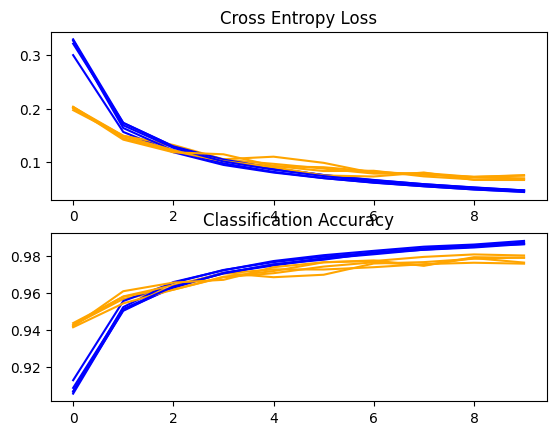

Accuracy: mean=97.830 std=0.171, n=5


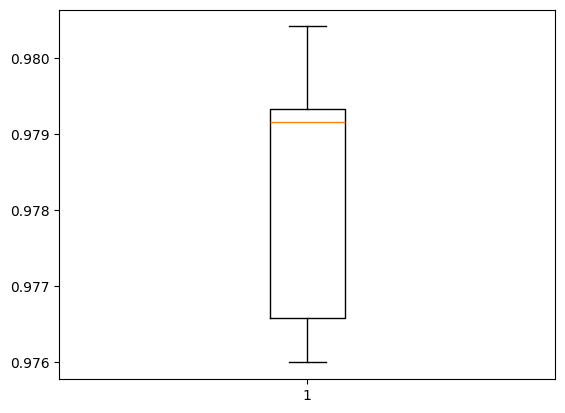

In [9]:
#baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.models import load_model

#load train and test dataset
def load_dataset():
  #load dataset
  (trainX, trainy), (testX, testy)=mnist.load_data()
  #reshape dataset to have a single channel
  trainX= trainX.reshape((trainX.shape[0],28,28,1))
  testX = testX.reshape((testX.shape[0],28,28,1))
  #one hot encode target values
  trainy = to_categorical(trainy)
  testy=to_categorical(testy)
  return trainX, trainy, testX, testy

#scale pixels
def prep_pixels(train, test):
  #convert from integers to floats
  train_norm = train.astype('float32')
  test_norm=test.astype('float32')
  #normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  #return normalized images
  return train_norm, test_norm

#define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  #compile model
  opt = SGD(learning_rate=0.01, momentum=0.01)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

#evaluate a model using k-fold cross validation
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  #prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  #enumerate splits
  for train_ix,test_ix in kfold.split(dataX):
    #define model
    model = define_model()
    #select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    #fit model
    history=model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    #evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.2f' % (acc * 100.0))
    #stores scores
    scores.append(acc)
    histories.append(history),model.save('model_' + str(train_ix[0]) + '.h5')
  return scores, histories

#plot diagnostic learning curves
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    #plot loss
    plt.subplot(2,1,1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    #plot accuracy
    plt.subplot(2,1,2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

#summarize model performance
def summarize_performance(scores):
  #print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  #box and whisker plots of results
  plt.boxplot(scores)
  plt.show()

#run the test harness for evaluating a model
def run_test_harness():
  #load dataset
  trainX, trainy, testX, testy = load_dataset()
  #prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  #evaluate model
  scores, histories = evaluate_model(trainX, trainy)
  #learning curves
  summarize_diagnostics(histories)
  #summarize estimated performance
  summarize_performance(scores)

#entry point, run then test harness
run_test_harness()



In [17]:
Accuracy: mean=98.703, std =0.156, n=5

SyntaxError: invalid syntax (<ipython-input-17-1516613838>, line 1)

In [15]:
model =load_model('/content/model_0.h5')

In [18]:
#make a prediction for a new image
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

#load and prepare the image
def load_image(filename):
  #load the image
  img = load_img(filename, grayscale=True, target_size=(28,28))
  #convert to array
  img = img_to_array(img)
  #reshape into a single sample with 1 channel
  img = img.reshape(1,28,28,1)
  #prepare pixel data
  img = img.astype('float32')
  img = img / 255.0
  return img

#load an image and predict the class
def run_example():
  #load the image
  img = load_image('/content/sample_image.png')
  #load model
  model = load_model('/content/model_0.h5')
  #predict the class
  digit = model.predict_classes(img)
  print(digit[0])

#entry point, run the example
run_example()


TypeError: load_img() got an unexpected keyword argument 'grayscale'